In [1]:
# importing modules from qiskit
from qiskit import *
import matplotlib.pyplot as mpl

In [2]:
# making a quantum cricuit with 3 classical bit and 3 quantum bits
qcircuit = QuantumCircuit(3,3)

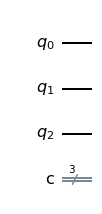

In [3]:
%matplotlib inline
qcircuit.draw(output='mpl')

## case 1: Kohli is calling the toss

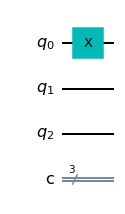

In [4]:
#need to make sure whatever he calls is the outcome for the example's sake we shall say he calls tails, 
# normal state of all qubits is always 0 we need to make q0 as 1 by using a quantum x gate
qcircuit.x(0)
qcircuit.draw(output='mpl')

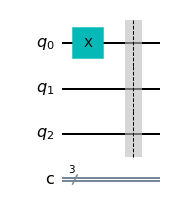

In [5]:
# add a barrier for better visualisation, q0 is what Virat is calling and q2 is the outcome, so we are 
# teleporting information from q0 to q2
qcircuit.barrier()
qcircuit.draw(output='mpl')

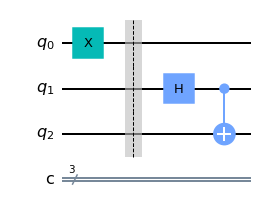

In [6]:
# for the teleportation protocol, the first task is to entangle bits q1 and q2 using a hadamard gate and 
# controlled not gate
qcircuit.h(1)
qcircuit.cx(1,2)
qcircuit.draw(output='mpl')

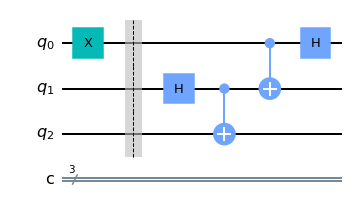

In [7]:
# the next task is to add a controlled not gate between q0 and q1 followed by a hadamard gate to q0
qcircuit.cx(0,1)
qcircuit.h(0)
qcircuit.draw(output='mpl')

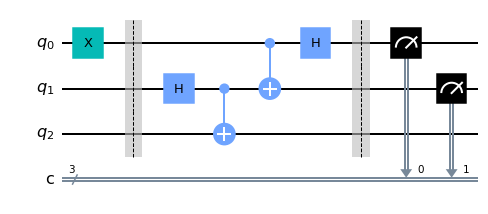

In [8]:
# now we measure what is happening at q0 and q1 using measure
qcircuit.barrier()
qcircuit.measure([0,1],[0,1])
qcircuit.draw(output='mpl')

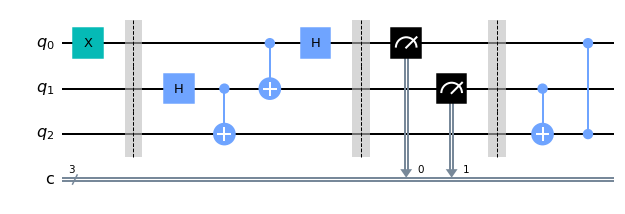

In [9]:
# the final part of the teleportaion protocol is a control x gate from q1 to q2 and a control z form q0 to q2
qcircuit.barrier()
qcircuit.cx(1,2)
qcircuit.cz(0,2)
qcircuit.draw(output='mpl')

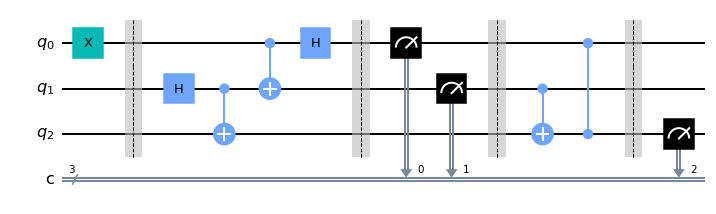

In [10]:
# the claim here is that I have teleported information form q0 to q2, so if I do the measurement 
# q2 should always be 1 as value of q0 was 1, we can verify by measuring q2
qcircuit.barrier()
qcircuit.measure(2,2)
qcircuit.draw(output='mpl')

In [11]:
# to verify our results we can use one of simulators from qiskit
# here the qasm_simulator which simulates circuits assuming zero noise so we get near perfect results
simulator=Aer.get_backend('qasm_simulator')

In [13]:
# execute the circuit using the said simulator
result = execute(qcircuit, backend=simulator, shots=1024).result()
counts=result.get_counts()

In [14]:
print(counts)

{'100': 254, '111': 258, '110': 258, '101': 254}


Simplest way to verify result is by simply printing it, q2 is denoted by the most significant bit of the result.
All the resulting counts have value of q2 as 1, so we can conclude teleportation protocol has worked.

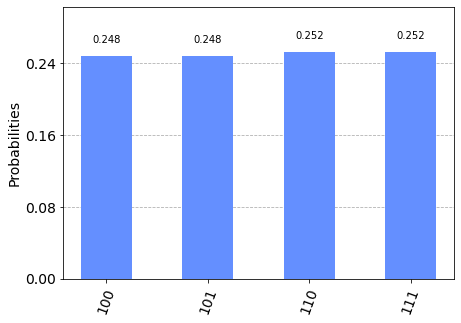

In [15]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

The more Intuitive way to verify is by plotting graph to verify and as stated above, all the results have value of q2 as 1.

In [16]:
# Running the same circuit on real quantum hardware 
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [17]:
provider = IBMQ.get_provider('ibm-q')

In [18]:
# there are many backends that we can choose from, this was least busy right now
qcomp = provider.get_backend('ibmq_santiago')

In [20]:
job = execute(qcircuit,backend=qcomp)

In [21]:
from qiskit.tools.monitor import job_monitor

In [22]:
job_monitor(job)

Job Status: job has successfully run


In [23]:
result = job.result()

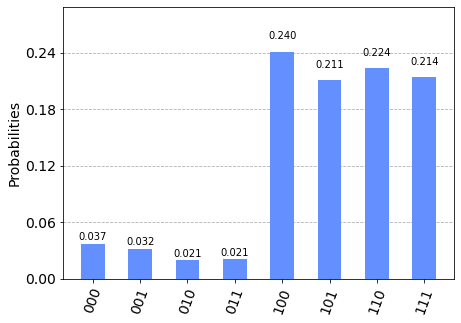

In [26]:
plot_histogram(result.get_counts(qcircuit))

Important to note here that, close to 11% of the results do not have value of q2 as 1, this is the kind of variance from the expected results we can observe when we run the circuit on real hardware, lots of R and D is happening to ensure the errors are brought down as much as possible.

In [27]:
print(result.get_counts(qcircuit))

{'000': 38, '001': 33, '010': 21, '011': 22, '100': 246, '101': 216, '110': 229, '111': 219}


## case 2: Kane is calling the toss
#### simulation very similar to previous one

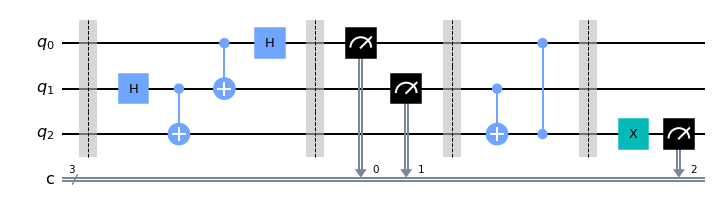

In [51]:
# lets say he calls heads in this case
# everything is same as the previous case, the only difference is that we flip the value of q2 before measuring using x
qc = QuantumCircuit(3,3)
qc.barrier()
qc.h(1)
qc.cx(1,2)
qc.cx(0,1)
qc.h(0)
qc.barrier()
qc.measure([0,1],[0,1])
qc.barrier()
qc.cx(1,2)
qc.cz(0,2)
qc.barrier()
qc.x(2)
qc.measure(2,2)
qc.draw(output='mpl')

In [52]:
simulator=Aer.get_backend('qasm_simulator')

In [53]:
result = execute(qc, backend=simulator, shots=1024).result()
counts=result.get_counts()

In [54]:
print(counts)

{'100': 249, '111': 258, '110': 235, '101': 282}


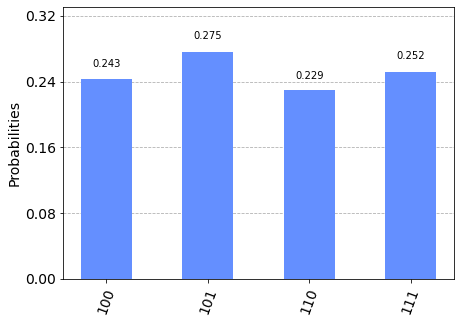

In [55]:
plot_histogram(counts)

Observe that all value of q2 are 1, whereas the value of q0 was 0. In this way whatever Kane calls During the toss, opposite of that will happen.

In [60]:
qcomp = provider.get_backend('ibmq_athens')

In [61]:
job = execute(qc,backend=qcomp)

In [62]:
job_monitor(job)

Job Status: job has successfully run


In [63]:
result = job.result()

In [65]:
print(result.get_counts(qc))

{'000': 13, '001': 12, '010': 29, '011': 34, '100': 233, '101': 228, '110': 252, '111': 223}


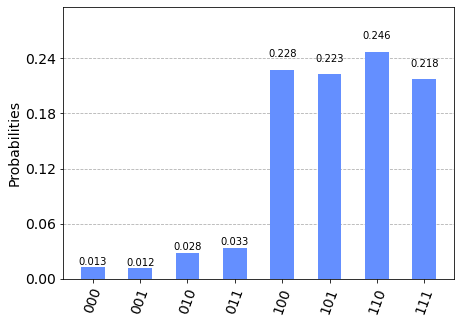

In [66]:
plot_histogram(result.get_counts(qc))